### `By : Mohamed Ahmed Saad Abohassan`

### `1 :  import Libaries`

In [1]:
# pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

## ` 2: Read & Load  Data`


In [3]:
train_data=pd.read_csv('train.csv')

In [4]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data=pd.read_csv('test.csv')
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_data.shape

(1460, 81)

In [7]:
test_data.shape

(1459, 80)

In [8]:
set(train_data.describe().columns)

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [9]:
num_columns=list(set(train_data.describe().columns)-set(["Id"]))
cat_columns=list(set(train_data.columns) - set(num_columns)- set(["Id"]))
len(num_columns)

37

## ` 3: Dealing with nulls`


In [10]:
train_data.isna().sum().reset_index().rename(columns={0:"null_count"})

,index,null_count
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
...,...,...
76,MoSold,0
77,YrSold,0
78,SaleType,0
79,SaleCondition,0


In [11]:
test_data.isna().sum().reset_index().rename(columns={0:"null_count"})

,index,null_count
0,Id,0
1,MSSubClass,0
2,MSZoning,4
3,LotFrontage,227
4,LotArea,0
...,...,...
75,MiscVal,0
76,MoSold,0
77,YrSold,0
78,SaleType,1


In [12]:
null_df=train_data.isna().sum().reset_index().rename(columns={0:"null_count"})
null_df[null_df["null_count"]>0].sort_values(by=["null_count"],ascending=False)

,index,null_count
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690
3,LotFrontage,259
58,GarageType,81
59,GarageYrBlt,81
60,GarageFinish,81
63,GarageQual,81


In [13]:
features_to_be_dropped=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]
features_to_be_filled=["LotFrontage"]
drobbing_na_rows=["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual","MasVnrArea","MasVnrType","Electrical"]

train_data=train_data.drop(columns=features_to_be_dropped)
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mean,inplace=True)

test_data=test_data.drop(columns=features_to_be_dropped)
test_data["LotFrontage"].fillna(train_data["LotFrontage"].mean,inplace=True)


In [14]:
train_data.dropna(subset=drobbing_na_rows,inplace=True)
test_data.dropna(subset=drobbing_na_rows,inplace=True)


In [15]:
train_data.shape

(1338, 76)

In [16]:
test_data.shape

(1324, 75)

In [17]:
null_df=train_data.isna().sum().reset_index().rename(columns={0:"null_count"})
null_df[null_df["null_count"]>0].sort_values(by=["null_count"],ascending=False)


,index,null_count


In [18]:
null_df=test_data.isna().sum().reset_index().rename(columns={0:"null_count"})
null_df[null_df["null_count"]>0].sort_values(by=["null_count"],ascending=False)


,index,null_count
2,MSZoning,1
8,Utilities,1
52,KitchenQual,1
54,Functional,1
73,SaleType,1


In [19]:
drobbing_na_add_rows=['MSZoning','Utilities','KitchenQual','Functional','SaleType']

In [20]:
test_data.dropna(subset=drobbing_na_add_rows,inplace=True)


In [21]:
null_df=test_data.isna().sum().reset_index().rename(columns={0:"null_count"})
null_df[null_df["null_count"]>0].sort_values(by=["null_count"],ascending=False)


,index,null_count


In [22]:
x=train_data.groupby(["TotRmsAbvGrd"])['Id'].count().reset_index().sort_values(by=["Id"],ascending=False).iloc[0,1]
x

379

In [23]:
num_columns=list(set(train_data.describe().columns)-set(["Id"]))
cat_columns=list(set(train_data.columns) - set(num_columns)- set(["Id"]))
len(num_columns)

36

In [24]:
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'MasVnrType', 'Neighborhood']

In [25]:
for ordi in ordinal_cats:
    print(f'{ordi} is {sorted(train_data[ordi].unique())}')


BsmtQual is ['Ex', 'Fa', 'Gd', 'TA']
LotShape is ['IR1', 'IR2', 'IR3', 'Reg']
HeatingQC is ['Ex', 'Fa', 'Gd', 'Po', 'TA']
BsmtFinType1 is ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf']
ExterQual is ['Ex', 'Fa', 'Gd', 'TA']
KitchenQual is ['Ex', 'Fa', 'Gd', 'TA']
BsmtExposure is ['Av', 'Gd', 'Mn', 'No']
GarageFinish is ['Fin', 'RFn', 'Unf']


In [26]:
labels=[
['Fa','TA','Gd','Ex'],
['IR3','IR2','IR1','Reg'],
['Po','Fa','TA','Gd','Ex'],
['Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
['Fa','TA','Gd','Ex'],
['Fa','TA','Gd','Ex'],
['No','Mn','Av','Gd'],
['Unf','RFn','Fin']]

labels_dictionary = { i : j for i,j in zip(labels[0],[j for j in range(len(labels[0]))]) }
# labels_dictionary

labels_dictionary

{'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}

In [27]:
new_labels=[]
for i in labels :
    for j in range(len(i)):
        out= { x : y for x,y in zip(i,[y for y in range(len(i))]) }
    new_labels.append(out)

mymap=[{'col': 'satisfaction_rating', 'mapping':new_labels[0]}]
mymap

[{'col': 'satisfaction_rating',
  'mapping': {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}}]

In [28]:
new_labels

[{'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3},
 {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3},
 {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 {'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5},
 {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3},
 {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3},
 {'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3},
 {'Unf': 0, 'RFn': 1, 'Fin': 2}]

In [29]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,194.0,TA,TA,PConc,TA,TA,Av,Rec,119.0,BLQ,344.0,641.0,1104.0,GasA,Fa,Y,SBrkr,1360,0,0,1360,1.0,0.0,1,0,3,1,TA,8,Typ,1,Attchd,1969.0,RFn,1.0,336.0,TA,TA,Y,160,0,0,0,0,0,0,5,2006,WD,Normal
1452,2913,160,RM,21,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,0,12,2006,WD,Abnorml
1455,2916,160,RM,21,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml


In [30]:
test_data.shape

(1319, 75)

In [31]:
test_data['SalePrice']=train_data['SalePrice']

In [32]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,208500.0
1,1462,20,RL,81,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,181500.0
2,1463,60,RL,74,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,223500.0
3,1464,60,RL,78,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,140000.0
4,1465,120,RL,43,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,194.0,TA,TA,PConc,TA,TA,Av,Rec,119.0,BLQ,344.0,641.0,1104.0,GasA,Fa,Y,SBrkr,1360,0,0,1360,1.0,0.0,1,0,3,1,TA,8,Typ,1,Attchd,1969.0,RFn,1.0,336.0,TA,TA,Y,160,0,0,0,0,0,0,5,2006,WD,Normal,287090.0
1452,2913,160,RM,21,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,0,12,2006,WD,Abnorml,145000.0
1455,2916,160,RM,21,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,175000.0
1456,2917,20,RL,160,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd

## ` 4: Auto Processing Data`


In [33]:
def auto_processing(data,test_data,num_columns,ordinal_cats,labels_ordinal,nominal_cats,response_var,sort_var,clamp_th,corr_th,dropp_th,alpha_th):
    
    #drop redd
    print("start dropping redondance features : \n")
    th_count=data.shape[0]*dropp_th
    columns_to_drop=[]
    for col in num_columns :
        if data.groupby(by=col)[sort_var].count().reset_index().sort_values(by=[sort_var],ascending=False).iloc[0,1] >th_count:
                columns_to_drop.append(col)
                print(f"{col} is redondance ----droped")
    data.drop(columns=columns_to_drop,inplace=True)
    test_data.drop(columns=columns_to_drop,inplace=True)
    
    print("----------done-------------")
    
    #dropp corr
    print("start dropping one feature of 2 highly correlated feature : \n")
    num_columns=list(set(data.describe().columns)-set([sort_var]))
    cat_columns=list(set(data.columns) - set(num_columns)- set([sort_var]))
    
    feature_to_drop=[]
    num_columns_with_out_response=list(set(num_columns)-set([response_var]))
    corr_mat=data[set(num_columns)-set([response_var])].corr()
    for row in range(corr_mat.shape[0]):
        for col in  range (row+1,corr_mat.shape[0]):
            if (np.abs(corr_mat.values[row,col])>corr_th):
                row_corr_with_response=np.abs(np.corrcoef(data[response_var],
                                                          data[num_columns_with_out_response[row]])[0,1] )
                
                col_corr_with_response=np.abs(np.corrcoef(data[response_var],
                                                          data[num_columns_with_out_response[col]])[0,1] )
                
                if row_corr_with_response>col_corr_with_response:
                    feature_to_drop.append(num_columns_with_out_response[col])
                    data.drop(columns=[num_columns_with_out_response[col]],inplace=True)

                    print(f" {num_columns_with_out_response[col]} is droped because corr")
                else:
                    
                    feature_to_drop.append(num_columns_with_out_response[row])
                    data.drop(columns=[num_columns_with_out_response[row]],inplace=True)
                    print(f" {num_columns_with_out_response[row]} is droped because corr")
    test_data.drop(columns=feature_to_drop,inplace=True)

                    
    print("----------done-------------")

        
    
    ##clamping_ouliers
    print("start clamping  ouliers : \n ")
    num_columns=list(set(data.describe().columns)-set([sort_var]))
    cat_columns=list(set(data.columns) - set(num_columns)- set([sort_var]))
    
    for col in num_columns:
        
        Q1 = np.percentile(data[col], 25) 

        Q3 = np.percentile(data[col], 75) 
        IQR = Q3 - Q1 
        upper = Q3+clamp_th*IQR
        lower = Q1-clamp_th*IQR
        data[col][data[col]<lower]=lower
        data[col][data[col]>upper]=upper
        
        test_data[col][test_data[col]<lower]=lower
        test_data[col][test_data[col]>upper]=upper
        
    print("data is clamping ouliers successfully")
    print("----------done-------------")

    
        
        
    ##skewness
    print("start remove skewness : \n ")
    m=data[num_columns].mean(axis=0)
    std=data[num_columns].std(axis=0)
            
    sk_coff=((data[num_columns]-m)**3).sum(axis=0)/((data.shape[0]-1)* std**3)
    
    i=0
    for col in num_columns:
        if abs(sk_coff[i]>1):
            data[col]=np.log(np.abs(data[col]+1))
            test_data[col]=np.log(np.abs(test_data[col]+1))

            print(f"{col} : removed skewness")
        i+=1
        
    print("----------done-------------")
    
    ##scaling
    
    print("chick for min_max_scale or std : \n")
    feats_std_scale = []
    feats_min_max_scale = []
    for col in num_columns:
        stat, p = shapiro(train_data[col])
        print('W_Statistic=%.3f, p=%.8f' % (stat, p))

        if p > alpha_th:
            print(f'{col} looks like gaussian (fail to reject H0)')
            feats_std_scale.append(col)
        else:
            print(f'{col} does not look Gaussian (reject H0)')
            feats_min_max_scale.append(col)
            
            
    print("----------done-------------")
    
    print("start scaling : \n  ")
    
    if len(feats_min_max_scale) !=0 :
        min_max_scaler = MinMaxScaler()
        min_max_scaler_model = min_max_scaler.fit(data[feats_min_max_scale])
        min_max_scaled_data = pd.DataFrame(min_max_scaler_model.transform(data[feats_min_max_scale]), columns = feats_min_max_scale)
        min_max_scaled_test_data = pd.DataFrame(min_max_scaler_model.transform(test_data[feats_min_max_scale]), columns = feats_min_max_scale)

    if len(feats_std_scale) !=0 :
        std_scaler = StandardScaler()
        std_scaler_model = std_scaler.fit(data[feats_std_scale])
        std_scaled_data =pd.DataFrame( std_scaler_model.transform(data[feats_std_scale]), columns = feats_std_scale)
        std_scaled_test_data =pd.DataFrame( std_scaler_model.transform(test_data[feats_std_scale]), columns = feats_std_scale)

        
    if len(feats_min_max_scale) and len(feats_std_scale) !=0:  
        num_train_df = std_scaled_data.merge(min_max_scaled_data, right_index = True, left_index = True)
        num_test_df = std_scaled_test_data.merge(min_max_scaled_test_data, right_index = True, left_index = True)

        print("----------done-------------")
#         return num_train_df
    
    if len(feats_min_max_scale) !=0 : 
        print("----------done-------------")
        num_train_df= min_max_scaled_data
        num_test_df= min_max_scaled_test_data
#         return num_train_df
    if len(feats_std_scale) !=0:
        print("----------done-------------")
        num_train_df= std_scaled_data
        num_test_df=std_scaled_test_data
#         return std_scaled_data
    
    
    num_columns=list(set(data.describe().columns)-set([sort_var]))
    ######## handling for categorical variables
    
    print("Start handling for categorical variables: \n ")
    ordinal_train_df = pd.DataFrame()
    ordinal_test_df = pd.DataFrame()

    i=0
    for ordinal_feat in ordinal_cats:
        mymap=[{'col': ordinal_feat, 'mapping':new_labels[i]}]
        label_enc_model = OrdinalEncoder(mapping=mymap)
        ordinal_train_df[ordinal_feat]=label_enc_model.fit_transform(train_data)[ordinal_feat]
        ordinal_test_df[ordinal_feat]=label_enc_model.transform(test_data)[ordinal_feat]
        i=i+1

    one_hot_enc_model = OneHotEncoder(sparse = False).fit(train_data[nominal_cats])
    nominal_train_data = one_hot_enc_model.transform(train_data[nominal_cats])
    nominal_test_data = one_hot_enc_model.transform(test_data[nominal_cats])

    a=one_hot_enc_model.categories_
    col_names=[]
    for list_ in a:
        for element in list_:
            col_names.append(element)

    nominal_train_df = pd.DataFrame(nominal_train_data, columns = col_names)
    nominal_test_data = pd.DataFrame(nominal_test_data, columns = col_names)

    
    
    
    final_data = nominal_train_df.merge(ordinal_train_df, right_index = True, left_index = True, how = 'inner')\
    .merge(num_train_df, right_index = True, left_index = True, how = 'inner')
    
    final_test_data = nominal_test_data.merge(ordinal_test_df, right_index = True, left_index = True, how = 'inner')\
    .merge(num_test_df, right_index = True, left_index = True, how = 'inner')
    
    print("----------done-------------")
        
    

    return final_data,final_test_data,num_columns
    


In [34]:
response_var='SalePrice'
sort_var='Id'

In [35]:
data_df,data_test_df,last_num_columns=auto_processing(train_data,test_data,num_columns,ordinal_cats,new_labels,nominal_cats,response_var,sort_var,clamp_th=1.5,corr_th=0.7,dropp_th=0.8,alpha_th=0.05)

start dropping redondance features : 

ScreenPorch is redondance ----droped
BsmtFinSF2 is redondance ----droped
3SsnPorch is redondance ----droped
PoolArea is redondance ----droped
KitchenAbvGr is redondance ----droped
MiscVal is redondance ----droped
LowQualFinSF is redondance ----droped
BsmtHalfBath is redondance ----droped
EnclosedPorch is redondance ----droped
----------done-------------
start dropping one feature of 2 highly correlated feature : 

 GarageYrBlt is droped because corr
 GarageArea is droped because corr
 TotalBsmtSF is droped because corr
 TotRmsAbvGrd is droped because corr
----------done-------------
start clamping  ouliers : 
 
data is clamping ouliers successfully
----------done-------------
start remove skewness : 
 
WoodDeckSF : removed skewness
OpenPorchSF : removed skewness
MSSubClass : removed skewness
MasVnrArea : removed skewness
----------done-------------
chick for min_max_scale or std : 

W_Statistic=0.918, p=0.00000000
YearBuilt does not look Gaussian 

In [36]:
data_df.shape

(1223, 125)

In [37]:
data_test_df.shape

(1197, 125)

In [38]:
data_test_df

,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Corner,CulDSac,FR2,FR3,Inside,Flat,Gable,Gambrel,Hip,Mansard,Shed,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,AsbShng,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,BrkTil,CBlock,PConc,Stone,Wood,C (all),FV,RH,RL,RM,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BsmtQual,LotShape,HeatingQC,BsmtFinType1,ExterQual,KitchenQual,BsmtExposure,GarageFinish,YearBuilt,YearRemodAdd,LotArea,2ndFlrSF,FullBath,WoodDeckSF,Fireplaces,GarageCars,OverallCond,BsmtFullBath,OverallQual,HalfBath,1stFlrSF,SalePrice,BsmtFinSF1,GrLivArea,YrSold,OpenPorchSF,BedroomAbvGr,MSSubClass,MasVnrArea,MoSold,BsmtUnfSF
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2,2,1,1,0,0,0.596708,0.183333,0.616364,0.000000,0.333333,0.813873,0.0,0.0,0.625,0.0,0.375,0.0,0.260820,0.554757,0.255389,0.199066,1.0,0.000000,0.375,0.000000,0.000000,0.454545,0.161931
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2,4,1,2,0,0,0.572016,0.133333,0.780987,0.000000,0.333333,0.982871,0.0,0.0,0.625,0.0,0.500,0.5,0.507403,0.468271,0.503683,0.387265,1.0,0.698371,0.625,0.000000,0.771903,0.454545,0.243497
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3,5,1,1,0,2,0.893004,0.800000,0.753789,0.378663,0.666667,0.881718,0.4,0.4,0.375,0.0,0.375,0.5,0.279043,0.602805,0.431651,0.517657,1.0,0.687624,0.625,0.549925,0.000000,0.181818,0.082165
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,4,5,1,2,0,2,0.901235,0.800000,0.514043,0.366239,0.666667,0.968485,0.4,0.4,0.625,0.0,0.500,0.5,0.277904,0.335339,0.328513,0.506791,1.0,0.698371,0.625,0.549925,0.500938,0.454545,0.194317
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,4,4,2,2,0,1,0.851852,0.700000,0.204526,0.000000,0.666667,0.000000,0.0,0.4,0.375,0.0,0.750,0.0,0.479499,0.687689,0.143520,0.365968,1.0,0.854628,0.375,0.903142,0.000000,0.000000,0.609941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [39]:
data_test_df.drop(columns='SalePrice',inplace=True)

In [40]:
data_test_df.shape

(1197, 124)

## ` 5:  evaluating the performance without any subset selection LR `

In [41]:
y = data_df[['SalePrice']]
X = data_df[list(set(data_df.columns) - set(['SalePrice']))]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
reg = LinearRegression().fit(X_train, y_train)
y_hat_sklearn = reg.predict(X_train)
y_hat_test_sklearn = reg.predict(X_test)
r2_score(y_train, y_hat_sklearn)


0.9110302395185914

In [44]:
r2_score(y_test, y_hat_test_sklearn)

-4.309927494723312e+21

In [45]:
def mse(actual, predicted):
    return mean_squared_error(actual, predicted)

def rmse(actual, predicted):
    return np.sqrt(np.mean(np.square(actual-predicted)))[0]

def mae(actual, predicted):
    return np.mean(np.abs(actual-predicted))[0]

def mape(actual, predicted, epsilon = 0.0001):
    return (np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100)[0]

def rae(actual, predicted):
    
    numerator = np.sum(np.abs(predicted - actual))
    denominator = np.sum(np.abs(np.mean(actual) - actual))
    return (numerator / denominator)[0]

def r_squared(actual, predicted):
    sse = np.sum(np.square(actual-predicted))
    sst = np.sum(np.square(actual-np.mean(actual)))
    return (1 - (sse/sst))[0]

def adj_r_squared(X, actual, predicted): 
    r_squ = r_squared(actual, predicted)
    first_term = 1 - r_squ
    sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
    return (1 - (first_term * sec_term))

In [46]:
print('The mean squared error is: ', mean_squared_error(y_train, y_hat_sklearn))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_hat_test_sklearn))

print('the root mean squard error is: ', rmse(y_train, y_hat_sklearn))
print('the root mean squard error for testing is: ', rmse(y_test, y_hat_test_sklearn))

print('The mean absolute error is: ', mae(y_train, y_hat_sklearn))
print('The mean absolute error for testing is: ', mae(y_test, y_hat_test_sklearn))

print('The mean absolute perentage error is: ', mape(y_train, y_hat_sklearn))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_hat_test_sklearn))

print('The relative absolute error is: ', rae(y_train, y_hat_sklearn))
print('The relative absolute error  for testing is: ', rae(y_test, y_hat_test_sklearn))

print('The coefficient of determination is: ', r_squared(y_train, y_hat_sklearn))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_hat_test_sklearn))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_hat_sklearn))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_hat_test_sklearn))


The mean squared error is:  0.003931074462182997
The mean squared error for testing is:  2.077719824061856e+20
the root mean squard error is:  0.06269828117407203
the root mean squard error for testing is:  14414297846.450434
The mean absolute error is:  0.04391746732258924
The mean absolute error for testing is:  1123784729.273461
The mean absolute perentage error is:  11.425782198533838
The mean absolute perentage error  for testing is:  416687979280.6306
The relative absolute error is:  0.2629283755535878
The relative absolute error  for testing is:  6516370269.424238
The coefficient of determination is:  0.9110302395185914
The coefficient of determination  for testing is:  -4.309927494723312e+21
The adjusted coefficient of determination is:  0.8980967690617395
The adjusted coefficient of determination  for testing is:  -8.763519239270734e+21


## ` 6:  subset selection  `

In [47]:
feats_high_vif_to_be_dropped = []
cleaned_df_from_multi_coll = X_train
num_cols_removed = 0

for origin_df_feat_index in range(len(X_train.columns)):
    
    num_cols_removed = X_train.shape[1] - cleaned_df_from_multi_coll.shape[1]
    cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
    VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
    
    if VIF_FEAT > 20:

        feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
        cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])

In [48]:
feats_high_vif_to_be_dropped

['CmentBd',
 '2ndFlrSF',
 'Inside',
 'StoneBr',
 'Wd Sdng',
 'Wood',
 'FV',
 'Flat',
 'BrkFace',
 'CarPort',
 '2Story',
 'MetalSd',
 '1stFlrSF',
 'Attchd',
 'GrLivArea',
 'BrkTil',
 'Hip',
 'MasVnrArea',
 'YearBuilt',
 'ExterQual',
 'VinylSd',
 'CBlock',
 'RL',
 'BedroomAbvGr']

In [49]:
X_train=cleaned_df_from_multi_coll

In [50]:
X_train

,FullBath,Fireplaces,OverallQual,Timber,BsmtFinSF1,CulDSac,OpenPorchSF,LotShape,OldTown,LotArea,Sawyer,ImStucc,ImStucc,MeadowV,Blueste,C (all),Crawfor,SawyerW,AsbShng,AsbShng,Somerst,RH,Other,WdShing,FR2,BrkCmn,SLvl,Gilbert,MSSubClass,Plywood,Plywood,ClearCr,BuiltIn,NAmes,1Story,CollgCr,Brk Cmn,YearRemodAdd,2.5Fin,Edwards,Stucco,Stucco,Gable,WoodDeckSF,GarageCars,Corner,Veenker,Blmngtn,NPkVill,KitchenQual,NoRidge,BsmtExposure,PConc,Wd Shng,AsphShn,Mitchel,2Types,SWISU,BsmtQual,Mansard,Shed,SFoyer,1.5Unf,BrDale,Detchd,FR3,Gambrel,OverallCond,1.5Fin,BsmtFullBath,None,HalfBath,2.5Unf,RM,HdBoard,HdBoard,NWAmes,BsmtFinType1,Basment,YrSold,BrkSide,IDOTRR,BrkComm,GarageFinish,Stone,Stone,Stone,Stone,CemntBd,MoSold,BsmtUnfSF,NridgHt,HeatingQC
983,0.666667,0.4,0.375,0.0,0.341610,0.0,0.597825,3,1.0,0.565204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.457589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650000,0.0,0.0,0.0,0.0,1.0,0.999906,0.4,0.0,0.0,0.0,0.0,2,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.272727,0.101957,0.0,4
1138,1.000000,0.4,0.500,0.0,0.000000,0.0,0.914303,2,0.0,0.645492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.696167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.883333,0.0,0.0,0.0,0.0,0.0,0.920106,0.4,0.0,0.0,0.0,0.0,2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.875,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,4,0.0,0.25,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.350851,0.0,2
987,0.666667,0.0,0.500,0.0,0.357981,0.0,0.000000,2,0.0,0.580141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.900000,0.0,0.0,0.0,0.0,1.0,0.662009,0.4,0.0,0.0,0.0,0.0,3,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,0.50,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.818182,0.361047,0.0,4
1135,0.666667,0.0,0.625,0.0,0.000000,0.0,0.781948,3,0.0,0.506014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.950000,0.0,0.0,0.0,0.0,0.0,0.000000,0.8,0.0,0.0,0.0,0.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.25,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.454545,1.000000,0.0,2
513,0.333333,0.4,0.375,0.0,0.584447,0.0,0.708553,3,0.0,0.516034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.416667,0.0,0.0,0.0,0.0,1.0,0.902030,0.4,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.272727,0.116950,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,0.666667,0.4,0.625,0.0,0.000000,1.0,0.795066,3,0.0,0.817833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.933333,0.0,0.0,0.0,0.0,0.0,0.818474,0.8,0.0,0.0,0.0,0.0,2,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.636364,1.000000,0.0,4
907,0.333333,0.4,0.750,0.0,0.117872,0.0,0.993292,2,1.0,0.992850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.0,0.0,0.0,0.0,1.0,0.000000,0.4,1.0,0.0,0.0,0.0,2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.0,0.0,2,0.0,0.75,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.909091,0.419822

In [51]:
X_test.shape

(245, 124)

In [52]:
X_test=X_test.drop(columns =feats_high_vif_to_be_dropped)

In [53]:
X_test.shape

(245, 93)

In [54]:
data_test_df=data_test_df.drop(columns =feats_high_vif_to_be_dropped)

In [55]:
data_test_df.shape

(1197, 93)

In [56]:
reg = LinearRegression().fit(X_train, y_train)
y_hat_sklearn = reg.predict(X_train)
r2_score(y_train, y_hat_sklearn)

0.8759281428494929

In [57]:
y_hat_test_sklearn1 = reg.predict(X_test)
r2_score(y_test, y_hat_test_sklearn1)

-1.0861717793841355e+24

In [58]:
X_train

,FullBath,Fireplaces,OverallQual,Timber,BsmtFinSF1,CulDSac,OpenPorchSF,LotShape,OldTown,LotArea,Sawyer,ImStucc,ImStucc,MeadowV,Blueste,C (all),Crawfor,SawyerW,AsbShng,AsbShng,Somerst,RH,Other,WdShing,FR2,BrkCmn,SLvl,Gilbert,MSSubClass,Plywood,Plywood,ClearCr,BuiltIn,NAmes,1Story,CollgCr,Brk Cmn,YearRemodAdd,2.5Fin,Edwards,Stucco,Stucco,Gable,WoodDeckSF,GarageCars,Corner,Veenker,Blmngtn,NPkVill,KitchenQual,NoRidge,BsmtExposure,PConc,Wd Shng,AsphShn,Mitchel,2Types,SWISU,BsmtQual,Mansard,Shed,SFoyer,1.5Unf,BrDale,Detchd,FR3,Gambrel,OverallCond,1.5Fin,BsmtFullBath,None,HalfBath,2.5Unf,RM,HdBoard,HdBoard,NWAmes,BsmtFinType1,Basment,YrSold,BrkSide,IDOTRR,BrkComm,GarageFinish,Stone,Stone,Stone,Stone,CemntBd,MoSold,BsmtUnfSF,NridgHt,HeatingQC
983,0.666667,0.4,0.375,0.0,0.341610,0.0,0.597825,3,1.0,0.565204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.457589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650000,0.0,0.0,0.0,0.0,1.0,0.999906,0.4,0.0,0.0,0.0,0.0,2,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.272727,0.101957,0.0,4
1138,1.000000,0.4,0.500,0.0,0.000000,0.0,0.914303,2,0.0,0.645492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.696167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.883333,0.0,0.0,0.0,0.0,0.0,0.920106,0.4,0.0,0.0,0.0,0.0,2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.875,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,4,0.0,0.25,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.350851,0.0,2
987,0.666667,0.0,0.500,0.0,0.357981,0.0,0.000000,2,0.0,0.580141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.900000,0.0,0.0,0.0,0.0,1.0,0.662009,0.4,0.0,0.0,0.0,0.0,3,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,0.50,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.818182,0.361047,0.0,4
1135,0.666667,0.0,0.625,0.0,0.000000,0.0,0.781948,3,0.0,0.506014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.950000,0.0,0.0,0.0,0.0,0.0,0.000000,0.8,0.0,0.0,0.0,0.0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.25,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.454545,1.000000,0.0,2
513,0.333333,0.4,0.375,0.0,0.584447,0.0,0.708553,3,0.0,0.516034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.416667,0.0,0.0,0.0,0.0,1.0,0.902030,0.4,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.272727,0.116950,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,0.666667,0.4,0.625,0.0,0.000000,1.0,0.795066,3,0.0,0.817833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.933333,0.0,0.0,0.0,0.0,0.0,0.818474,0.8,0.0,0.0,0.0,0.0,2,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.636364,1.000000,0.0,4
907,0.333333,0.4,0.750,0.0,0.117872,0.0,0.993292,2,1.0,0.992850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.0,0.0,0.0,0.0,1.0,0.000000,0.4,1.0,0.0,0.0,0.0,2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.0,0.0,2,0.0,0.75,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.909091,0.419822

In [59]:
LRresult = OLS(y_train,X_train).fit().summary2().tables[1].reset_index().rename(columns = {'index' : 'feature_name'})
LRresult

,feature_name,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
0,FullBath,0.148075,0.022718,6.517998,1.193917e-10,0.103488,0.192662
1,Fireplaces,0.064101,0.012583,5.094375,4.275392e-07,0.039406,0.088796
2,OverallQual,0.385597,0.026936,14.315554,5.661001e-42,0.332732,0.438462
3,Timber,-0.039856,0.024270,-1.642198,1.009033e-01,-0.087490,0.007777
4,BsmtFinSF1,0.189789,0.022128,8.576997,4.301425e-17,0.146360,0.233218
...,...,...,...,...,...,...,...
88,CemntBd,0.036739,0.016350,2.247058,2.488148e-02,0.004650,0.068828
89,MoSold,0.004454,0.010681,0.417031,6.767566e-01,-0.016508,0.025416
90,BsmtUnfSF,0.099450,0.019617,5.069678,4.851257e-07,0.060950,0.137951
91,NridgHt,0.036811,0.020793,1.770376,7.700802e-02,-0.003998,0.077620


In [60]:
significant_feats_df = X_train
LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
insignificant_feats_ls = []

while LRresult['P>|t|'].max() > 0.05:
    insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
    insignificant_feats_ls.append(insignificant_feat)
    significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
    LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [61]:
X_train=significant_feats_df

In [62]:
len(insignificant_feats_ls)

42

In [63]:
X_test=X_test.drop(columns =insignificant_feats_ls)

In [64]:
X_test.shape

(245, 44)

In [65]:
X_train.shape

(978, 44)

In [66]:
data_test_df=data_test_df.drop(columns =insignificant_feats_ls)

In [67]:
data_test_df.shape

(1197, 44)

In [68]:
LRresult = OLS(y_train,X_train).fit().summary2()
LRresult

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.977     
Dependent Variable:     SalePrice        AIC:                         -2175.9390
Date:                   2022-04-22 06:04 BIC:                         -1960.9765
No. Observations:       978              Log-Likelihood:              1132.0    
Df Model:               44               F-statistic:                 962.7     
Df Residuals:           934              Prob (F-statistic):          0.00      
R-squared (uncentered): 0.978            Scale:                       0.0060560 
------------------------------------------------------------------------------------
                  Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
FullBath          0.1407       0.0205      6.8754     0.0000      0.1005      0.1809
Fireplaces        0.0684       0.0120      5.7158     0.0000      0.0449      0.0919
OverallQual       0.3867       0.0248     15.5930     0.0000      0.3380      0.4353
BsmtFinSF1        0.1834       0.0210      8.7469     0.0000      0.1422      0.2245
OpenPorchSF       0.0201       0.0075      2.6947     0.0072      0.0055      0.0348
OldTown          -0.0993       0.0126     -7.8778     0.0000     -0.1240     -0.0746
LotArea           0.1345       0.0147      9.1692     0.0000      0.1057      0.1633
Sawyer           -0.0993       0.0140     -7.1175     0.0000     -0.1267     -0.0719
MeadowV          -0.1138       0.0296     -3.8378     0.0001     -0.1720     -0.0556
C (all)          -0.0936       0.0420     -2.2318     0.0259     -0.1760     -0.0113
Crawfor           0.0340       0.0156      2.1701     0.0302      0.0032      0.0647
SawyerW          -0.0693       0.0143     -4.8307     0.0000     -0.0974     -0.0411
FR2              -0.0477       0.0146     -3.2697     0.0011     -0.0763     -0.0191
Gilbert          -0.1002       0.0131     -7.6618     0.0000     -0.1259     -0.0746
MSSubClass       -0.0653       0.0105     -6.2235     0.0000     -0.0859     -0.0447
BuiltIn           0.0295       0.0119      2.4919     0.0129      0.0063      0.0528
NAmes            -0.0811       0.0101     -7.9989     0.0000     -0.1010     -0.0612
1Story           -0.0368       0.0079     -4.6430     0.0000     -0.0524     -0.0212
CollgCr          -0.0617       0.0102     -6.0267     0.0000     -0.0818     -0.0416
YearRemodAdd      0.0299       0.0116      2.5646     0.0105      0.0070      0.0527
2.5Fin            0.0834       0.0381      2.1909     0.0287      0.0087      0.1581
Edwards          -0.1195       0.0130     -9.2207     0.0000     -0.1450     -0.0941
Stucco            0.0781       0.0377      2.0718     0.0386      0.0041      0.1521
Stucco           -0.1091       0.0388     -2.8088     0.0051     -0.1853     -0.0329
Gable            -0.0145       0.0063     -2.3141     0.0209     -0.0267     -0.0022
WoodDeckSF        0.0176       0.0064      2.7411     0.0062      0.0050      0.0301
GarageCars        0.1133       0.0146      7.7392     0.0000      0.0846      0.1420
NPkVill          -0.0798       0.0288     -2.7735     0.0057     -0.1362     -0.0233
NoRidge           0.0479       0.0164      2.9175     0.0036      0.0157      0.0802
PConc             0.0230       0.0083      2.7623     0.0059      0.0066      0.0393
Wd Shng          -0.0527       0.0169     -3.1226     0.0018     -0.0858     -0.0196
Mitchel          -0.0897       0.0155     -5.7773     0.0000     -0.1202     -0.0592
SWISU            -0.1024       0.0241     -4.2565     0.0000     -0.1496     -0.0552
1.5Unf           -0.0947       0.0309     -3.0616     0.0023     -0.1554     -0.0340
BrDale           -0.0893       0.0298     -2.9960     0.0028     -0.1477     -0.0308
OverallCond      

## ` 7:  evaluating the performance with subset selection  LR `

In [69]:
reg = LinearRegression().fit(X_train, y_train)
y_hat_test_sklearn = reg.predict(X_test)
y_hat_sklearn = reg.predict(X_train)

In [70]:
r2_score(y_train, y_hat_sklearn)

0.8697079808353777

In [71]:
print('The mean squared error is: ', mean_squared_error(y_train, y_hat_sklearn))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_hat_test_sklearn))

print('the root mean squard error is: ', rmse(y_train, y_hat_sklearn))
print('the root mean squard error for testing is: ', rmse(y_test, y_hat_test_sklearn))

print('The mean absolute error is: ', mae(y_train, y_hat_sklearn))
print('The mean absolute error for testing is: ', mae(y_test, y_hat_test_sklearn))

print('The mean absolute perentage error is: ', mape(y_train, y_hat_sklearn))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_hat_test_sklearn))

print('The relative absolute error is: ', rae(y_train, y_hat_sklearn))
print('The relative absolute error  for testing is: ', rae(y_test, y_hat_test_sklearn))

print('The coefficient of determination is: ', r_squared(y_train, y_hat_sklearn))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_hat_test_sklearn))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_hat_sklearn))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_hat_test_sklearn))


The mean squared error is:  0.005756873193688469
The mean squared error for testing is:  0.006881144164256408
the root mean squard error is:  0.07587406140235588
the root mean squard error for testing is:  0.08295266218908472
The mean absolute error is:  0.05349897847237198
The mean absolute error for testing is:  0.05917579521130336
The mean absolute perentage error is:  13.131147921379604
The mean absolute perentage error  for testing is:  364.52839908157176
The relative absolute error is:  0.3202916825825692
The relative absolute error  for testing is:  0.34313635213193894
The coefficient of determination is:  0.8697079808353777
The coefficient of determination  for testing is:  0.8572606754518763
The adjusted coefficient of determination is:  0.8635634483131447
The adjusted coefficient of determination  for testing is:  0.8258580240512892


## ` 8: Ridge and Lasso regression `

In [72]:
y = data_df[['SalePrice']]

X = data_df[list(set(data_df.columns) - set(['SalePrice']))]

In [73]:
lambda_ = 0.0001
ridge_coeffs = (np.linalg.inv(X_train.T.dot(X_train) +
               (lambda_ * np.identity(X_train.shape[1])))).dot(X_train.T.dot(y_train))

In [74]:
y_ridge_from_scratch = X_train.values.dot(ridge_coeffs)
y_ridge_test_from_scratch = X_test.values.dot(ridge_coeffs)


### ` 8.1:  evaluating the performance Ridge from scratch  `

In [75]:
print('The mean squared error is: ', mean_squared_error(y_train, y_ridge_from_scratch))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_ridge_test_from_scratch))

print('the root mean squard error is: ', rmse(y_train, y_ridge_from_scratch))
print('the root mean squard error for testing is: ', rmse(y_test, y_ridge_test_from_scratch))

print('The mean absolute error is: ', mae(y_train, y_ridge_from_scratch))
print('The mean absolute error for testing is: ', mae(y_test, y_ridge_test_from_scratch))

print('The mean absolute perentage error is: ', mape(y_train, y_ridge_from_scratch))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_ridge_test_from_scratch))

print('The relative absolute error is: ', rae(y_train, y_ridge_from_scratch))
print('The relative absolute error  for testing is: ', rae(y_test, y_ridge_test_from_scratch))

print('The coefficient of determination is: ', r_squared(y_train, y_ridge_from_scratch))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_ridge_test_from_scratch))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_ridge_from_scratch))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_ridge_test_from_scratch))


The mean squared error is:  0.005783518312746559
The mean squared error for testing is:  0.006740153947209541
the root mean squard error is:  0.07604944649862067
the root mean squard error for testing is:  0.08209844058938963
The mean absolute error is:  0.05369873557553813
The mean absolute error for testing is:  0.05862628499936466
The mean absolute perentage error is:  13.19489902359714
The mean absolute perentage error  for testing is:  407.36508387492216
The relative absolute error is:  0.3214876033367193
The relative absolute error  for testing is:  0.3399499660612391
The coefficient of determination is:  0.8691049370916373
The coefficient of determination  for testing is:  0.8601853123827083
The adjusted coefficient of determination is:  0.8629319652074272
The adjusted coefficient of determination  for testing is:  0.8294260811069042


### ` 8.2:  evaluating the performance Ridge sklearn `

In [76]:
#search for best lamda
ranges=np.arange(0.0, 1.0, 0.1)
scores=[]
for i in ranges:
    sklearn_ridge = Ridge(alpha = i, fit_intercept=False)
    sklearn_ridge.fit(X_train, y_train)
    y_ridge_sklearn = sklearn_ridge.predict(X_train)
    mse= mean_squared_error(y_train, y_ridge_sklearn)
    scores.append(mse)
    print(f'the mse is {mse} at lamda = {i}')
ranges[scores.index(min(scores))]

the mse is 0.005783518312300694 at lamda = 0.0
the mse is 0.00578394478544889 at lamda = 0.1
the mse is 0.00578515293603671 at lamda = 0.2
the mse is 0.005787048457777878 at lamda = 0.30000000000000004
the mse is 0.005789551197408783 at lamda = 0.4
the mse is 0.0057925924999751004 at lamda = 0.5
the mse is 0.005796113152114709 at lamda = 0.6000000000000001
the mse is 0.005800061768029304 at lamda = 0.7000000000000001
the mse is 0.005804393507879826 at lamda = 0.8
the mse is 0.0058090690491243175 at lamda = 0.9


0.0

In [77]:
min(scores)

0.005783518312300694

In [78]:
sklearn_ridge = Ridge(alpha = 0, fit_intercept=False)
sklearn_ridge.fit(X_train, y_train)
y_ridge_sklearn = sklearn_ridge.predict(X_train)
y_ridge_test_sklearn = sklearn_ridge.predict(X_test)
y_ridge_sklearn.shape

(978, 1)

In [79]:
print('The mean squared error is: ', mean_squared_error(y_train, y_ridge_sklearn))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_ridge_test_sklearn))

print('the root mean squard error is: ', rmse(y_train, y_ridge_sklearn))
print('the root mean squard error for testing is: ', rmse(y_test, y_ridge_test_sklearn))

print('The mean absolute error is: ', mae(y_train, y_ridge_sklearn))
print('The mean absolute error for testing is: ', mae(y_test, y_ridge_test_sklearn))

print('The mean absolute perentage error is: ', mape(y_train, y_ridge_sklearn))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_ridge_test_sklearn))

print('The relative absolute error is: ', rae(y_train, y_ridge_sklearn))
print('The relative absolute error  for testing is: ', rae(y_test, y_ridge_test_sklearn))

print('The coefficient of determination is: ', r_squared(y_train, y_ridge_sklearn))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_ridge_test_sklearn))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_ridge_sklearn))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_ridge_test_sklearn))


The mean squared error is:  0.005783518312300694
The mean squared error for testing is:  0.006740187153909953
the root mean squard error is:  0.07604944649568919
the root mean squard error for testing is:  0.08209864282623647
The mean absolute error is:  0.05369876023230244
The mean absolute error for testing is:  0.05862634135696761
The mean absolute perentage error is:  13.194893106766875
The mean absolute perentage error  for testing is:  407.37803402687985
The relative absolute error is:  0.32148775095367793
The relative absolute error  for testing is:  0.33995029285604134
The coefficient of determination is:  0.8691049371017283
The coefficient of determination  for testing is:  0.8601846235580196
The adjusted coefficient of determination is:  0.8629319652179942
The adjusted coefficient of determination  for testing is:  0.8294252407407839


### ` 8.3:  evaluating the performance Lasso `

In [80]:
#search for best lamda
ranges=np.arange(0.0, 1.0, 0.1)
for i in ranges:
    sklearn_lasso = Lasso (alpha = i, fit_intercept=False)
    sklearn_lasso.fit(X_train, y_train)
    y_lasso_sklearn = sklearn_lasso.predict(X_train)
    mse= mean_squared_error(y_train, y_lasso_sklearn)
    print(f'the mse is {mse} at lamda = {i}')
ranges[scores.index(min(scores))]

the mse is 0.005783518312300693 at lamda = 0.0
the mse is 0.054253108319479104 at lamda = 0.1
the mse is 0.13025888575645636 at lamda = 0.2
the mse is 0.2209124082838337 at lamda = 0.30000000000000004
the mse is 0.2680675214428751 at lamda = 0.4
the mse is 0.2680675214428751 at lamda = 0.5
the mse is 0.2680675214428751 at lamda = 0.6000000000000001
the mse is 0.2680675214428751 at lamda = 0.7000000000000001
the mse is 0.2680675214428751 at lamda = 0.8
the mse is 0.2680675214428751 at lamda = 0.9


0.0

In [81]:
sklearn_lasso = Lasso (alpha = 0, fit_intercept=False)
sklearn_lasso.fit(X_train, y_train)
y_lasso_sklearn = sklearn_lasso.predict(X_train).reshape(X_train.shape[0],1)
y_lasso_test_sklearn = sklearn_lasso.predict(X_test).reshape(X_test.shape[0],1)


In [82]:
# y_lasso_sklearn

In [83]:
print('The mean squared error is: ', mean_squared_error(y_train, y_lasso_sklearn))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_lasso_test_sklearn))

print('the root mean squard error is: ', rmse(y_train, y_lasso_sklearn))
print('the root mean squard error for testing is: ', rmse(y_test, y_lasso_test_sklearn))

print('The mean absolute error is: ', mae(y_train, y_lasso_sklearn))
print('The mean absolute error for testing is: ', mae(y_test, y_lasso_test_sklearn))

print('The mean absolute perentage error is: ', mape(y_train, y_lasso_sklearn))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_lasso_test_sklearn))

print('The relative absolute error is: ', rae(y_train, y_lasso_sklearn))
print('The relative absolute error  for testing is: ', rae(y_test, y_lasso_test_sklearn))

print('The coefficient of determination is: ', r_squared(y_train, y_lasso_sklearn))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_lasso_test_sklearn))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_lasso_sklearn))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_lasso_test_sklearn))


The mean squared error is:  0.005783518312300693
The mean squared error for testing is:  0.006740187153855823
the root mean squard error is:  0.07604944649568912
the root mean squard error for testing is:  0.08209864282590686
The mean absolute error is:  0.05369876023236265
The mean absolute error for testing is:  0.058626341356937194
The mean absolute perentage error is:  13.194893106768072
The mean absolute perentage error  for testing is:  407.3780340008595
The relative absolute error is:  0.32148775095403853
The relative absolute error  for testing is:  0.33995029285586487
The coefficient of determination is:  0.8691049371017283
The coefficient of determination  for testing is:  0.8601846235591424
The adjusted coefficient of determination is:  0.8629319652179942
The adjusted coefficient of determination  for testing is:  0.8294252407421537


In [84]:
X_test.shape

(245, 44)

## ` 9:  Checking the linear regression model assumptions `

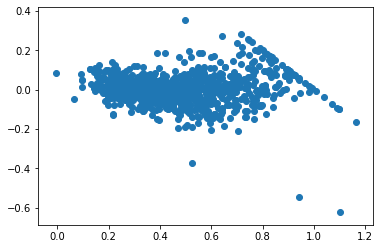

In [85]:
residuals = y_train - y_lasso_sklearn
plt.scatter(y_lasso_sklearn, residuals)
plt.show()


In [86]:
(residuals).mean()[0]

0.0005154275946573913

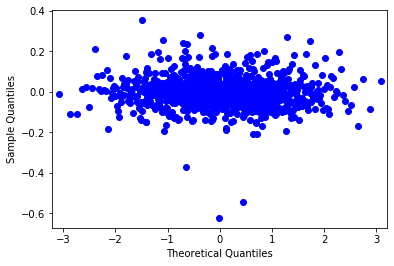

In [87]:
## checking the normality of residuals
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot 
fig = sm.qqplot(residuals, fit = False )
plt.show()

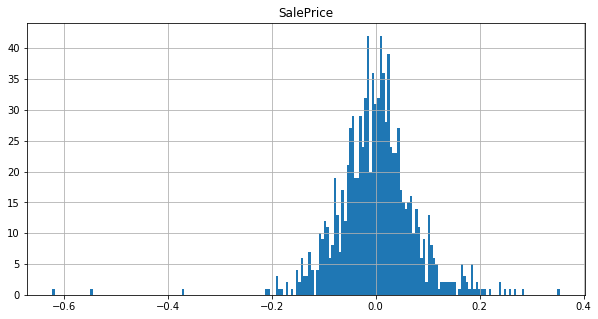

In [88]:
residuals.hist(bins = 200, figsize = (10, 5));

## ` 10: basis expansion of the input features with polynomial degree = 2 `

In [89]:
data_df.shape

(1223, 125)

In [90]:
y = data_df[['SalePrice']]
X = data_df[list(set(data_df.columns) - set(['SalePrice']))]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [92]:
X_train.shape

(978, 124)

In [93]:
cat_col=list(set(X_train.columns) - set(last_num_columns))
len(cat_col)

87

In [94]:
len(X_train.columns)

124

In [95]:
last_num_columns=list(set(last_num_columns) - set(['SalePrice']))

In [96]:
len(last_num_columns)

22

In [97]:
num_df_train=X_train[last_num_columns]
num_df_train

,YearBuilt,YearRemodAdd,LotArea,2ndFlrSF,FullBath,WoodDeckSF,Fireplaces,GarageCars,OverallCond,BsmtFullBath,OverallQual,HalfBath,1stFlrSF,BsmtFinSF1,GrLivArea,YrSold,OpenPorchSF,BedroomAbvGr,MSSubClass,MasVnrArea,MoSold,BsmtUnfSF
983,0.390947,0.650000,0.565204,0.199865,0.666667,0.999906,0.4,0.4,1.000,0.0,0.375,0.0,0.374715,0.341610,0.446811,0.00,0.597825,0.625,0.457589,0.000000,0.272727,0.101957
1138,0.786008,0.883333,0.645492,0.393248,1.000000,0.920106,0.4,0.4,0.875,0.0,0.500,0.5,0.399772,0.000000,0.621536,0.25,0.914303,0.625,0.696167,0.710389,0.000000,0.350851
987,0.679012,0.900000,0.580141,0.000000,0.666667,0.662009,0.0,0.4,0.875,0.0,0.500,0.0,0.466970,0.357981,0.356406,0.50,0.000000,0.625,0.000000,0.818859,0.818182,0.361047
1135,0.975309,0.950000,0.506014,0.000000,0.666667,0.000000,0.0,0.8,0.625,0.0,0.625,0.0,0.712415,0.000000,0.543736,0.25,0.781948,0.625,0.000000,0.000000,0.454545,1.000000
513,0.703704,0.416667,0.516034,0.000000,0.333333,0.902030,0.4,0.4,0.375,0.5,0.375,0.0,0.541572,0.584447,0.413343,0.00,0.708553,0.375,0.000000,0.000000,0.272727,0.116950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,0.967078,0.933333,0.817833,0.000000,0.666667,0.818474,0.4,0.8,0.375,0.0,0.625,0.0,0.701595,0.000000,0.535478,0.00,0.795066,0.625,0.000000,0.548273,0.636364,1.000000
907,0.000000,0.600000,0.992850,0.446185,0.333333,0.000000,0.4,0.4,1.000,0.0,0.750,0.5,0.272210,0.117872,0.566772,0.75,0.993292,0.875,0.628213,0.000000,0.909091,0.419822
1330,0.983539,0.983333,0.469479,0.000000,0.666667,0.000000,0.4,0.8,0.375,0.0,0.750,0.0,0.649203,0.000000,0.495491,0.75,0.698371,0.625,0.000000,0.867606,0.363636,0.943399
609,0.555556,0.616667,0.775261,0.000000,0.333333,0.940763,0.4,0.4,0.625,0.5,0.375,0.5,0.568907,0.539154,0.434206,0.00,0.000000,0.625,0.000000,0.000000,0.909091,0.119949


In [98]:
cat_df_train=X_train[cat_col]

In [99]:
cat_df_train=cat_df_train.values


In [100]:
num_df_test=X_test[last_num_columns]
num_df_test.shape

(245, 22)

In [101]:
cat_df_test=X_test[cat_col]
cat_df_test=cat_df_test.values

In [102]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(num_df_train)
test_poly=poly.transform(num_df_test)


In [103]:
X_poly.shape

(978, 276)

In [104]:
X_poly=np.concatenate((X_poly, cat_df_train), axis=1)

In [105]:
X_poly.shape

(978, 378)

In [106]:
test_poly=np.concatenate((test_poly, cat_df_test), axis=1)
test_poly.shape

(245, 378)

In [107]:
X_train=X_poly
X_test=test_poly

## ` 11: Evalutation of basis expansion degree = 2   `

### `11.1 without any subset selection LR`

In [108]:
reg = LinearRegression().fit(X_train, y_train)
y_hat_sklearn = reg.predict(X_train)
y_hat_test_sklearn = reg.predict(X_test)


In [109]:
print('The mean squared error is: ', mean_squared_error(y_train, y_hat_sklearn))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_hat_test_sklearn))

print('the root mean squard error is: ', rmse(y_train, y_hat_sklearn))
print('the root mean squard error for testing is: ', rmse(y_test, y_hat_test_sklearn))

print('The mean absolute error is: ', mae(y_train, y_hat_sklearn))
print('The mean absolute error for testing is: ', mae(y_test, y_hat_test_sklearn))

print('The mean absolute perentage error is: ', mape(y_train, y_hat_sklearn))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_hat_test_sklearn))

print('The relative absolute error is: ', rae(y_train, y_hat_sklearn))
print('The relative absolute error  for testing is: ', rae(y_test, y_hat_test_sklearn))

print('The coefficient of determination is: ', r_squared(y_train, y_hat_sklearn))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_hat_test_sklearn))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_hat_sklearn))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_hat_test_sklearn))


The mean squared error is:  0.0017033946354877852
The mean squared error for testing is:  0.01826695933689294
the root mean squard error is:  0.041272201728133964
the root mean squard error for testing is:  0.13515531560724103
The mean absolute error is:  0.03078000585128805
The mean absolute error for testing is:  0.07049402797684047
The mean absolute perentage error is:  8.162415180305302
The mean absolute perentage error  for testing is:  24.668210583364132
The relative absolute error is:  0.18427603938459428
The relative absolute error  for testing is:  0.40876617746641597
The coefficient of determination is:  0.961448043230271
The coefficient of determination  for testing is:  0.6210785045254315
The adjusted coefficient of determination is:  0.9371197633321783
The adjusted coefficient of determination  for testing is:  1.6899764544462292


### `11.2 with subset selection LR`

In [110]:
X_train=pd.DataFrame(X_train)

In [111]:
X_test=pd.DataFrame(X_test)

In [112]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377
0,1.0,0.390947,0.650000,0.565204,0.199865,0.666667,0.999906,0.4,0.4,1.000,0.0,0.375,0.0,0.374715,0.341610,0.446811,0.00,0.597825,0.625,0.457589,0.000000,0.272727,0.101957,0.152839,0.254115,0.220964,0.078137,0.260631,0.390910,0.156379,0.156379,0.390947,0.000000,0.146605,0.000000,0.146494,0.133551,0.174679,0.000000,0.233717,0.244342,0.178893,0.000000,0.106622,0.039860,0.422500,0.367382,0.129912,0.433333,0.649939,0.260000,0.260000,0.650000,0.000000,0.243750,0.000000,0.243565,0.222046,0.290427,0.000000,0.388586,0.406250,0.297433,0.000000,0.177273,0.066272,0.319455,0.112964,0.376802,0.565150,0.226081,0.226081,0.565204,0.000000,0.211951,0.000000,0.211790,0.193079,0.252539,0.000000,0.337893,0.353252,0.258631,0.000000,0.154146,0.057626,0.039946,0.133243,0.199846,0.079946,0.079946,0.199865,0.0,0.074949,0.000000,0.074892,0.068276,0.089302,0.000000,0.119484,0.124916,0.091456,0.000000,0.054509,0.020378,0.444444,0.666604,0.266667,0.266667,0.666667,0.000000,0.250000,0.000000,0.249810,0.227740,0.297874,0.000000,0.398550,0.416667,0.305059,0.000000,0.181818,0.067971,0.999812,0.399962,0.399962,0.999906,0.000000,0.374965,0.000000,0.374680,0.341578,0.446769,0.000000,0.597768,0.624941,0.457546,0.000000,0.272702,0.101947,0.16,0.16,0.40,0.0,0.15,0.0,0.149886,0.136644,0.178724,0.0,0.239130,0.25,0.183036,0.000000,0.109091,0.040783,0.16,0.40,0.0,0.15,0.0,0.149886,0.136644,0.178724,0.0,0.239130,0.25,0.183036,0.000000,0.109091,0.040783,1.000000,0.0000,0.375000,0.0000,0.374715,0.341610,0.446811,0.00000,0.597825,0.625000,0.457589,0.000000,0.272727,0.101957,0.00,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.140625,0.0000,0.140518,0.128104,0.167554,0.00000,0.224184,0.234375,0.171596,0.000000,0.102273,0.038234,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.140412,0.128006,0.167427,0.000000,0.224014,0.234197,0.171466,0.000000,0.102195,0.038205,0.116697,0.152635,0.000000,0.204223,0.213506,0.156317,0.000000,0.093166,0.034829,0.199640,0.000000,0.267114,0.279257,0.204456,0.000000,0.121857,0.045555,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.357394,0.373640,0.273558,0.000000,0.163043,0.060952,0.390625,0.285993,0.000000,0.170455,0.063723,0.209388,0.000000,0.124797,0.046654,0.000000,0.000000,0.000000,0.074380,0.027806,0.010395,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0

In [113]:
feats2_high_vif_to_be_dropped = []
cleaned_df2_from_multi_coll = X_train
num_cols_removed = 0

for origin_df_feat_index in range(len(X_train.columns)):
    
    num_cols_removed = X_train.shape[1] - cleaned_df2_from_multi_coll.shape[1]
    cleaned_df2_feat_index = origin_df_feat_index - num_cols_removed
    VIF_FEAT = variance_inflation_factor(cleaned_df2_from_multi_coll.values, cleaned_df_feat_index)
    
    if VIF_FEAT > 20:

        feats2_high_vif_to_be_dropped.append(cleaned_df2_from_multi_coll.columns[cleaned_df_feat_index])
        cleaned_df2_from_multi_coll = cleaned_df2_from_multi_coll.drop(columns = [cleaned_df2_from_multi_coll.columns[cleaned_df_feat_index]])

In [114]:
X_train=cleaned_df2_from_multi_coll

In [115]:
len(feats2_high_vif_to_be_dropped)

32

In [116]:
X_train.shape

(978, 346)

In [117]:
X_test=X_test.drop(columns =feats2_high_vif_to_be_dropped)

In [118]:
X_test.shape

(245, 346)

In [119]:
significant_feats_df = X_train
LRresult = (OLS(y_train.values,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
insignificant_feats_ls = []

while LRresult['P>|t|'].max() > 0.05:
    insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
    insignificant_feats_ls.append(insignificant_feat)
    significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
    LRresult = (OLS(y_train.values,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [120]:
X_train=significant_feats_df

In [121]:
len(insignificant_feats_ls)

245

In [122]:
X_test=X_test.drop(columns =insignificant_feats_ls)

In [123]:
reg = LinearRegression().fit(X_train, y_train)
y_hat_test_sklearn = reg.predict(X_test)
y_hat_sklearn = reg.predict(X_train)

In [124]:
print('The mean squared error is: ', mean_squared_error(y_train, y_hat_sklearn))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_hat_test_sklearn))

print('the root mean squard error is: ', rmse(y_train, y_hat_sklearn))
print('the root mean squard error for testing is: ', rmse(y_test, y_hat_test_sklearn))

print('The mean absolute error is: ', mae(y_train, y_hat_sklearn))
print('The mean absolute error for testing is: ', mae(y_test, y_hat_test_sklearn))

print('The mean absolute perentage error is: ', mape(y_train, y_hat_sklearn))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_hat_test_sklearn))

print('The relative absolute error is: ', rae(y_train, y_hat_sklearn))
print('The relative absolute error  for testing is: ', rae(y_test, y_hat_test_sklearn))

print('The coefficient of determination is: ', r_squared(y_train, y_hat_sklearn))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_hat_test_sklearn))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_hat_sklearn))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_hat_test_sklearn))


The mean squared error is:  0.002647745015501514
The mean squared error for testing is:  0.00684288234989148
the root mean squard error is:  0.0514562436979373
the root mean squard error for testing is:  0.0827217163137436
The mean absolute error is:  0.03773727878611704
The mean absolute error for testing is:  0.055058026840984896
The mean absolute perentage error is:  10.038311799376737
The mean absolute perentage error  for testing is:  29.772524640474412
The relative absolute error is:  0.22592836094496466
The relative absolute error  for testing is:  0.3192590892667759
The coefficient of determination is:  0.9400751010668474
The coefficient of determination  for testing is:  0.8580543611250824
The adjusted coefficient of determination is:  0.9331659517606278
The adjusted coefficient of determination  for testing is:  0.7577990497518888


In [125]:
X_train.shape

(978, 101)

In [126]:
X_test.shape

(245, 101)

###  `11.3 with Ridge`

In [127]:
X_train=X_poly
X_test=test_poly

In [138]:
X_train.shape

(978, 378)

In [128]:
ranges=np.arange(0.0, 1.0, 0.1)
scores=[]
for i in ranges:
    sklearn_ridge = Ridge(alpha = i, fit_intercept=False)
    sklearn_ridge.fit(X_train, y_train)
    y_ridge_sklearn = sklearn_ridge.predict(X_train)
    mse= mean_squared_error(y_train, y_ridge_sklearn)
    scores.append(mse)
    print(f'the mse is {mse} at lamda = {i}')
ranges[scores.index(min(scores))]

the mse is 0.0017290190578790493 at lamda = 0.0
the mse is 0.002140351352083324 at lamda = 0.1
the mse is 0.002250334392148645 at lamda = 0.2
the mse is 0.00232681671809044 at lamda = 0.30000000000000004
the mse is 0.0023872599902677316 at lamda = 0.4
the mse is 0.002438003901869883 at lamda = 0.5
the mse is 0.002482134312026133 at lamda = 0.6000000000000001
the mse is 0.0025214103092959543 at lamda = 0.7000000000000001
the mse is 0.00255694139085259 at lamda = 0.8
the mse is 0.002589478472367722 at lamda = 0.9


0.0

In [129]:
sklearn_ridge = Ridge(alpha = 0, fit_intercept=False)
sklearn_ridge.fit(X_train, y_train)
y_ridge_sklearn = sklearn_ridge.predict(X_train)
y_ridge_test_sklearn = sklearn_ridge.predict(X_test)


In [130]:
print('The mean squared error is: ', mean_squared_error(y_train, y_ridge_sklearn))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_ridge_test_sklearn))

print('the root mean squard error is: ', rmse(y_train, y_ridge_sklearn))
print('the root mean squard error for testing is: ', rmse(y_test, y_ridge_test_sklearn))

print('The mean absolute error is: ', mae(y_train, y_ridge_sklearn))
print('The mean absolute error for testing is: ', mae(y_test, y_ridge_test_sklearn))

print('The mean absolute perentage error is: ', mape(y_train, y_ridge_sklearn))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_ridge_test_sklearn))

print('The relative absolute error is: ', rae(y_train, y_ridge_sklearn))
print('The relative absolute error  for testing is: ', rae(y_test, y_ridge_test_sklearn))

print('The coefficient of determination is: ', r_squared(y_train, y_ridge_sklearn))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_ridge_test_sklearn))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_ridge_sklearn))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_ridge_test_sklearn))


The mean squared error is:  0.0017290190578790493
The mean squared error for testing is:  4.867723288410445e+21
the root mean squard error is:  0.04158147493631086
the root mean squard error for testing is:  69769071144.81635
The mean absolute error is:  0.030914254211135753
The mean absolute error for testing is:  5080959916.476867
The mean absolute perentage error is:  8.25864870205969
The mean absolute perentage error  for testing is:  5657208432539.528
The relative absolute error is:  0.1850797674984271
The relative absolute error  for testing is:  29462418626.449642
The coefficient of determination is:  0.9608681003305481
The coefficient of determination  for testing is:  -1.0097383773530651e+23
The adjusted coefficient of determination is:  0.9361738464489909
The adjusted coefficient of determination  for testing is:  1.8386280901055813e+23


###  `11.4 with Lasso`

In [131]:
#search for best lamda
ranges=np.arange(0.0, 1.0, 0.1)
for i in ranges:
    sklearn_lasso = Lasso (alpha = i, fit_intercept=False)
    sklearn_lasso.fit(X_train, y_train)
    y_lasso_sklearn = sklearn_lasso.predict(X_train)
    mse= mean_squared_error(y_train, y_lasso_sklearn)
    print(f'the mse is {mse} at lamda = {i}')
ranges[scores.index(min(scores))]

the mse is 0.0020366331554363946 at lamda = 0.0
the mse is 0.05124026968887341 at lamda = 0.1
the mse is 0.05623543635745879 at lamda = 0.2
the mse is 0.06455992843211392 at lamda = 0.30000000000000004
the mse is 0.07582432600229874 at lamda = 0.4
the mse is 0.08422268147559143 at lamda = 0.5
the mse is 0.09411054912265027 at lamda = 0.6000000000000001
the mse is 0.10579621088735615 at lamda = 0.7000000000000001
the mse is 0.11927966676970912 at lamda = 0.8
the mse is 0.13456091676970908 at lamda = 0.9


0.0

In [132]:
from sklearn.linear_model import Lasso 
sklearn_lasso = Lasso (alpha = 0, fit_intercept=False)
sklearn_lasso.fit(X_train, y_train)
y_lasso_sklearn = sklearn_lasso.predict(X_train).reshape(X_train.shape[0],1)
y_lasso_test_sklearn = sklearn_lasso.predict(X_test).reshape(X_test.shape[0],1)


In [133]:
print('The mean squared error is: ', mean_squared_error(y_train, y_lasso_sklearn))
print('The mean squared error for testing is: ', mean_squared_error(y_test, y_lasso_test_sklearn))

print('the root mean squard error is: ', rmse(y_train, y_lasso_sklearn))
print('the root mean squard error for testing is: ', rmse(y_test, y_lasso_test_sklearn))

print('The mean absolute error is: ', mae(y_train, y_lasso_sklearn))
print('The mean absolute error for testing is: ', mae(y_test, y_lasso_test_sklearn))

print('The mean absolute perentage error is: ', mape(y_train, y_lasso_sklearn))
print('The mean absolute perentage error  for testing is: ', mape(y_test, y_lasso_test_sklearn))

print('The relative absolute error is: ', rae(y_train, y_lasso_sklearn))
print('The relative absolute error  for testing is: ', rae(y_test, y_lasso_test_sklearn))

print('The coefficient of determination is: ', r_squared(y_train, y_lasso_sklearn))
print('The coefficient of determination  for testing is: ', r_squared(y_test, y_lasso_test_sklearn))

print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_lasso_sklearn))
print('The adjusted coefficient of determination  for testing is: ', adj_r_squared(X_test,y_test, y_lasso_test_sklearn))


The mean squared error is:  0.0020366331554363946
The mean squared error for testing is:  0.0075193093828972565
the root mean squard error is:  0.04512907217566518
the root mean squard error for testing is:  0.08671395148934949
The mean absolute error is:  0.0330939673706034
The mean absolute error for testing is:  0.061855928647459965
The mean absolute perentage error is:  8.827719264801207
The mean absolute perentage error  for testing is:  203.1126820638011
The relative absolute error is:  0.19812943714312506
The relative absolute error  for testing is:  0.35867735512523613
The coefficient of determination is:  0.9539060463568405
The coefficient of determination  for testing is:  0.844022866435744
The adjusted coefficient of determination is:  0.9248183761112407
The adjusted coefficient of determination  for testing is:  1.2840180641020782


### ` 11.5:  Checking the linear regression model assumptions `

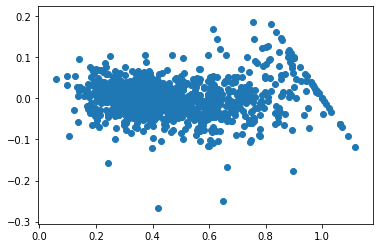

In [134]:
residuals = y_train - y_lasso_sklearn
plt.scatter(y_lasso_sklearn, residuals)
plt.show()


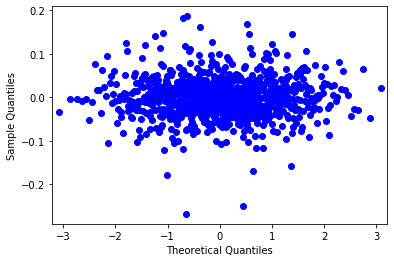

In [135]:
## checking the normality of residuals


#create Q-Q plot 
fig = sm.qqplot(residuals, fit = False )
plt.show()

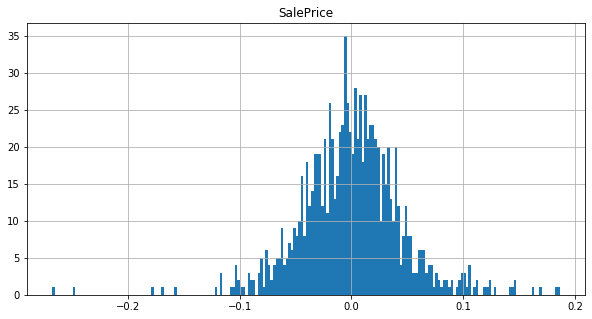

In [136]:
residuals.hist(bins = 200, figsize = (10, 5));

## `12: Summary`

In [137]:
# the best  R2 adjusted for all the models for test data is linear regression with subset selection
# the result of ridge and lasso was very very close to LR result 
# when i make  basis expansion to the data the result of R2 adjusted become 1
# and it did not look sense because the result in 
# R2 score was diff and look that there is overfitting  and when using subset selection 
#the result become more reasonable but not better  linear regression with subset selection 
#and when using  ridge and lasso  the results become bad again